In [11]:
#Compute wave energy

import numpy as np
from ReadTurbineData import ReadTurbineData
import geopandas as gpd
import matplotlib.pyplot as plt

#Get wave data
WaveData='WaveHsTp_WWIII.npz'
WaveFile=np.load(WaveData)
HsNC=WaveFile["HsNC"]
TpNC=WaveFile["TpNC"]

LatLong=WaveFile["LatLong"]


EnergyFlux=0.5*(HsNC**2)*TpNC
EnergyFlux=EnergyFlux.mean(axis=1)

Text(35.347222222222214, 0.5, 'Latitude')

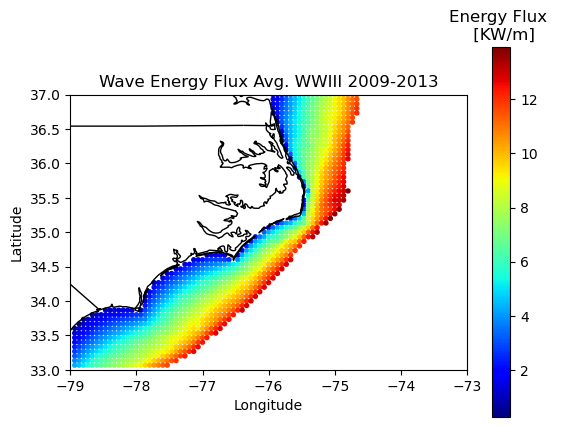

In [12]:
#### Plot
ShapeFileCoast="./GEO_data/ne_10m_coastline.shp"
ShapeFileStates="./GEO_data/ne_10m_admin_1_states_provinces_lines.shp"

DepthSites=WaveFile["Depth"]
ShoreDistance=WaveFile["ShoreDistance"]

min_longitude=-79
max_longitude=-73

min_latitude=33
max_latitude=37


xlim =[min_longitude,max_longitude]
ylim=[min_latitude, max_latitude]

df = gpd.read_file(ShapeFileCoast)
df1 = gpd.read_file(ShapeFileStates)

#### CF
fig, ax = plt.subplots(figsize  = None)

df.plot(color='black',linewidth=1,ax=ax)
df1.plot(color='black',linewidth=1,ax=ax)

plt.scatter(LatLong[:,1],LatLong[:,0],c=EnergyFlux, s=8, cmap='jet')

clb = plt.colorbar()
clb.ax.set_title('Energy Flux \n [KW/m]')
plt.title("Wave Energy Flux Avg. WWIII 2009-2013")
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# plt.scatter([-75.2],[35.2], s=30, marker="x",linewidths=1, color="black")   
# plt.scatter([-76.5],[34.2], s=30, marker="o",linewidths=1, facecolors='none', edgecolors='black')   
# plt.scatter([-75.5],[36.0], s=30, marker="D",   facecolors='none', edgecolors='black') 
# plt.scatter([-77.1],[34.2], s=30, marker=">",linewidths=1, facecolors='none', edgecolors='black')  

In [6]:
#Plot resource distribution at specific location
from matplotlib.colors import TwoSlopeNorm
lat,long=-77.1,34.2
Idx=np.argmin((LatLong[:,0]-lat)**2+(LatLong[:,1]-long)**2)
heatmap, xbins, ybins = np.histogram2d(TpNC[Idx,:],HsNC[Idx,:], bins=30)
heatmap, xbins, ybins = np.histogram2d(D1_TpNC[:,0],D1_HsNC[:,0], bins=30)
heatmap=heatmap.T/heatmap.sum()*100


plt.imshow(heatmap,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],cmap='Reds',aspect='auto')
#show colorbar and title of colorbar
clb = plt.colorbar()
clb.ax.set_title('[%] Data \n ')


plt.xlabel("Tp [s]")
plt.ylabel("Hs [m]")

plt.title("Wave Energy Resource at Lat:\n "+str(lat)+" Long: "+str(long))

NameError: name 'D1_TpNC' is not defined

In [7]:
#Compute wave energy

import numpy as np
from ReadTurbineData import ReadTurbineData
import geopandas as gpd
import matplotlib.pyplot as plt

#Get turbine data
TurbineFile='Pelamis.csv'
Turbine=ReadTurbineData(TurbineFile)

RatedPower=Turbine["RatedPower"]
E_Mec2El=Turbine["E_Mec2El"]
E_Av=Turbine["E_Av"]
E_Tr=Turbine["E_Tr"]
Te_Bins=Turbine["Te_Bins"]
Hs_Bins=Turbine["Hs_Bins"]
MP_Matrix=Turbine["MP_Matrix"]

#Get wave data
WaveData='WaveHsTp_WWIII.npz'
WaveFile=np.load(WaveData)
HsNC=WaveFile["HsNC"]
TpNC=WaveFile["TpNC"]

LatLong=WaveFile["LatLong"]

HsShape=HsNC.shape



In [8]:
#Create an one dimensional vector with the Hs data. This procedure facilitates significantly the future steps
D1_HsNC=np.reshape(HsNC,(np.size(HsNC),1))

#Index of the Hs set value closest to the observed Hs value
IdxHs=np.reshape(np.argmin(np.abs(D1_HsNC-Hs_Bins.T),axis=1), HsShape)

#Create an one dimensional vector with the Tp data.
D1_TpNC=np.reshape(TpNC,(np.size(TpNC),1))

#Index of the Tp set value closest to the observed Tp value
IdxTp=np.reshape(np.argmin(np.abs(D1_TpNC-Te_Bins.T),axis=1),HsShape)

EnergyProduction=np.minimum(MP_Matrix[IdxHs,IdxTp]*E_Mec2El,RatedPower)

WakeEffect=0.95
EnergyPu=EnergyProduction/RatedPower*WakeEffect

EnergyPu=EnergyPu*E_Av*E_Tr

In [9]:
IdxHs=np.reshape(np.argmin(np.abs(D1_HsNC-Hs_Bins.T),axis=1), HsShape)

KeyboardInterrupt: 

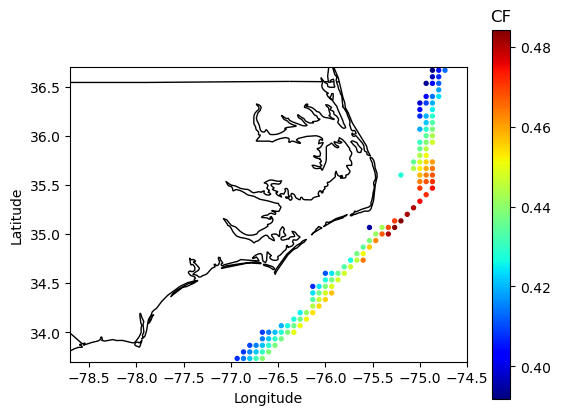

In [ ]:
#Create an one dimensional vector with the Hs data. This procedure facilitates significantly the future steps
D1_HsNC=np.reshape(HsNC,(np.size(HsNC),1))

#Index of the Hs set value closest to the observed Hs value
IdxHs=np.reshape(np.argmin(np.abs(D1_HsNC-Hs_Bins.T),axis=1), HsShape)

#Create an one dimensional vector with the Tp data.
D1_TpNC=np.reshape(TpNC,(np.size(TpNC),1))

#Index of the Tp set value closest to the observed Tp value
IdxTp=np.reshape(np.argmin(np.abs(D1_TpNC-Te_Bins.T),axis=1),HsShape)

EnergyProduction=np.minimum(MP_Matrix[IdxHs,IdxTp]*E_Mec2El,RatedPower)

WakeEffect=0.95
EnergyPu=EnergyProduction/RatedPower*WakeEffect

EnergyPu=EnergyPu*E_Av*E_Tr

    
    #### Plot
ShapeFileCoast="./GEO_data/ne_10m_coastline.shp"
ShapeFileStates="./GEO_data/ne_10m_admin_1_states_provinces_lines.shp"

DepthSites=WaveFile["Depth"]
ShoreDistance=WaveFile["ShoreDistance"]
AvgWaveEnergy=np.average(EnergyPu,axis=1)

min_longitude=-78.7
max_longitude=-74.5

min_latitude=33.7
max_latitude=36.7

xlim =[min_longitude,max_longitude]
ylim=[min_latitude, max_latitude]

df = gpd.read_file(ShapeFileCoast)
df1 = gpd.read_file(ShapeFileStates)

#### CF
fig, ax = plt.subplots(figsize  = None)

df.plot(color='black',linewidth=1,ax=ax)
df1.plot(color='black',linewidth=1,ax=ax)

plt.scatter(LatLong[:,1],LatLong[:,0],c=AvgWaveEnergy, s=8, cmap='jet')

clb = plt.colorbar()
clb.ax.set_title('CF')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.savefig('CF'+TurbineFile+".png",dpi=700)
